# 02. Creating a bar graph

In [1]:
%%html
<iframe width="700" height="400" src="https://www.youtube.com/embed/woUQ9LLaees/" frameborder="0" allowfullscreen></iframe>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

In [2]:
import findspark

findspark.init()
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

spark = SparkSession.builder.appName("statistics").master("local").getOrCreate()

[khanacademy](https://www.khanacademy.org/math/ap-statistics/analyzing-categorical-ap/analyzing-one-categorical-variable/v/creating-bar-charts-1?modal=1)

![Creating a bar graph fig 1](./imgs/01-02-01.png)

In [3]:
dataset = {
    "Favorite course": ["Language", "History", "Geometry", "Chemistry", "Physics"],
    "number of teachers": [7, 3, 9, 1, 0],
}

In [4]:
df = pd.DataFrame(dataset).set_index("Favorite course")
df

,number of teachers
Favorite course,
Language,7
History,3
Geometry,9
Chemistry,1
Physics,0


In [5]:
sdf = spark.createDataFrame(zip(*dataset.values()), schema=list(dataset.keys()))
sdf.show()

+---------------+------------------+
|Favorite course|number of teachers|
+---------------+------------------+
|       Language|                 7|
|        History|                 3|
|       Geometry|                 9|
|      Chemistry|                 1|
|        Physics|                 0|
+---------------+------------------+



<AxesSubplot:xlabel='Favorite course'>

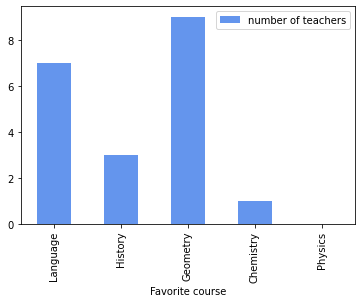

In [5]:
df.plot(kind="bar", color="cornflowerblue")

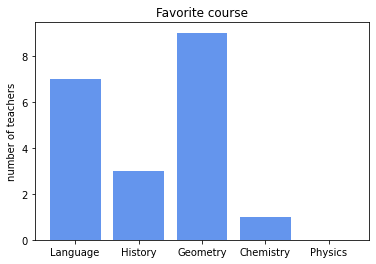

In [6]:
plt.bar(x=df.index, height=df["number of teachers"], color="cornflowerblue")
plt.title("Favorite course")
plt.ylabel("number of teachers")
plt.show()

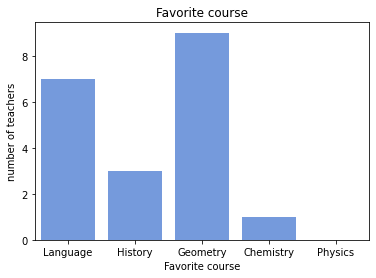

In [7]:
sns.barplot(x=df.index, y=df["number of teachers"], color="cornflowerblue")
plt.title("Favorite course")
plt.ylabel("number of teachers")
plt.show()

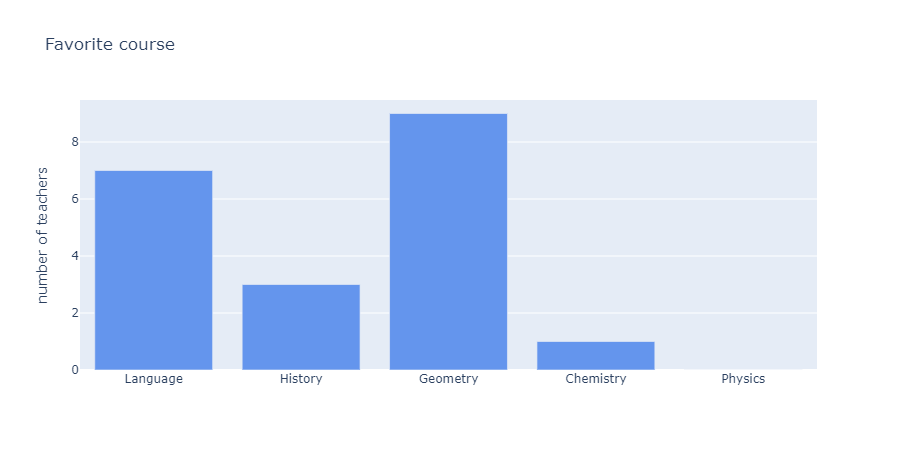

In [14]:
data = [
    go.Bar(x=df.index, y=df["number of teachers"], marker=dict(color="cornflowerblue"))
]
layout = go.Layout(title="Favorite course", yaxis=dict(title="number of teachers"))
fig = go.Figure(data, layout)
fig.show()